In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as sp
from scipy.interpolate import UnivariateSpline
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'

In [3]:
pressure = [0.014, 0.02, 0.05, 0.1, 0.23, 0.5]

In [141]:
r = 9.1 * 10**3
vac = [[] for i in range(len(pressure))]
for i in range(len(pressure)):
    f = open('{}torr'.format(pressure[i]))
    for line in f:
        tmp = line.replace(',', '.')
        vac[i].append(list(map(float, tmp.split())))
    vac[i] = np.array(vac[i])
    vac[i][:, 1] = vac[i][:, 1] / r 
    vac[i] = vac[i][vac[i][:, 0].argsort()]

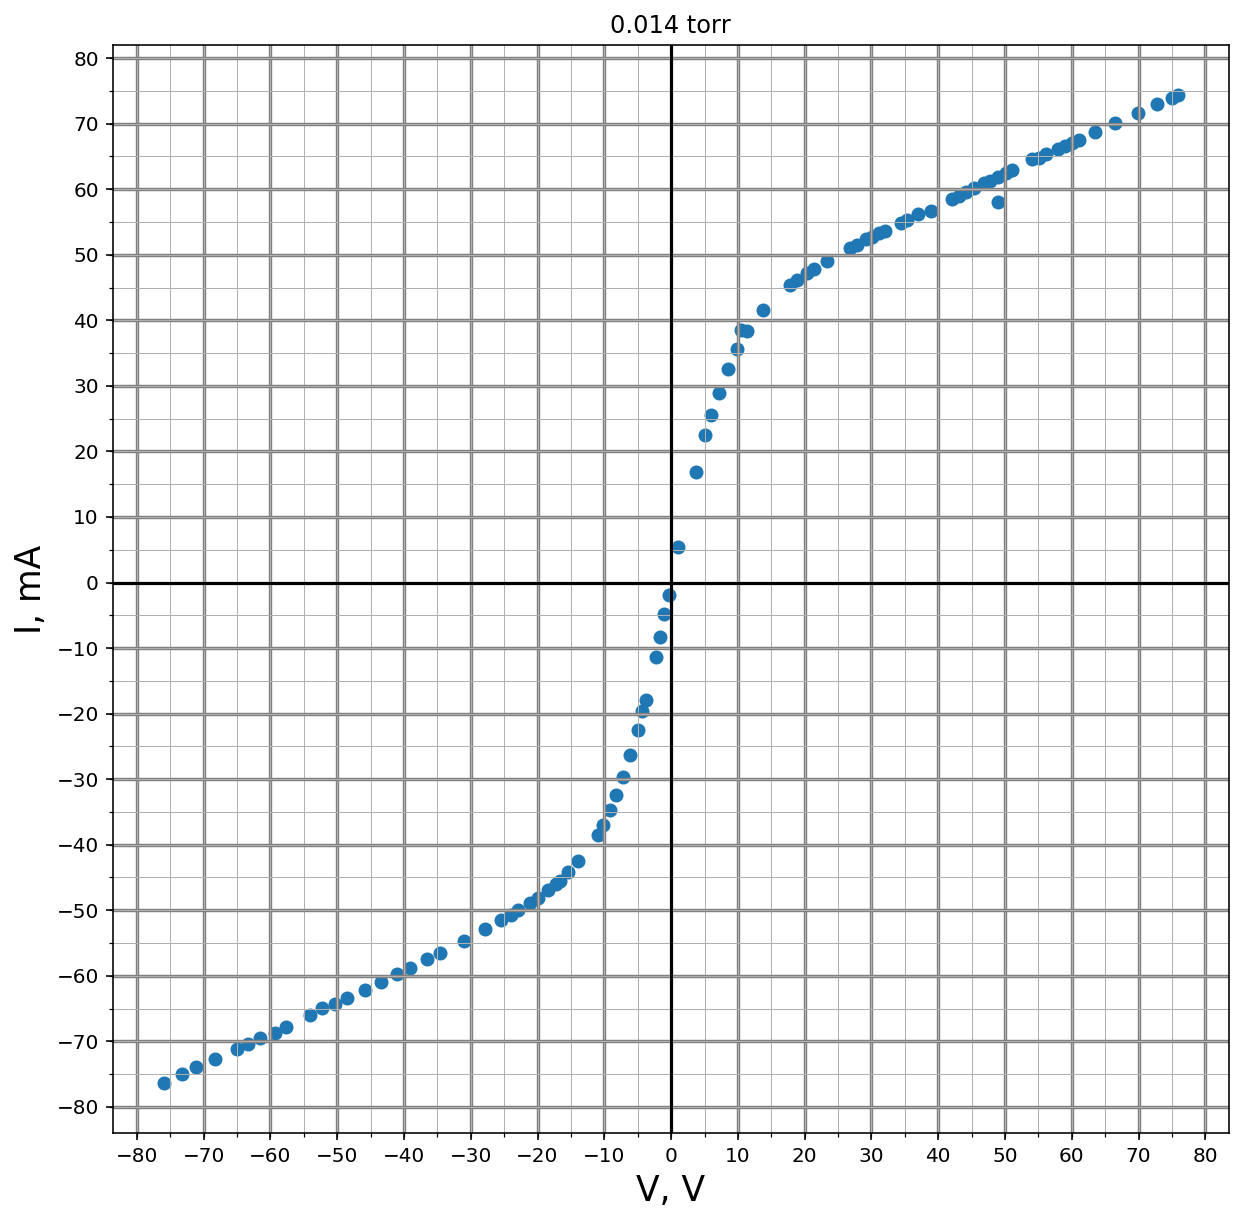

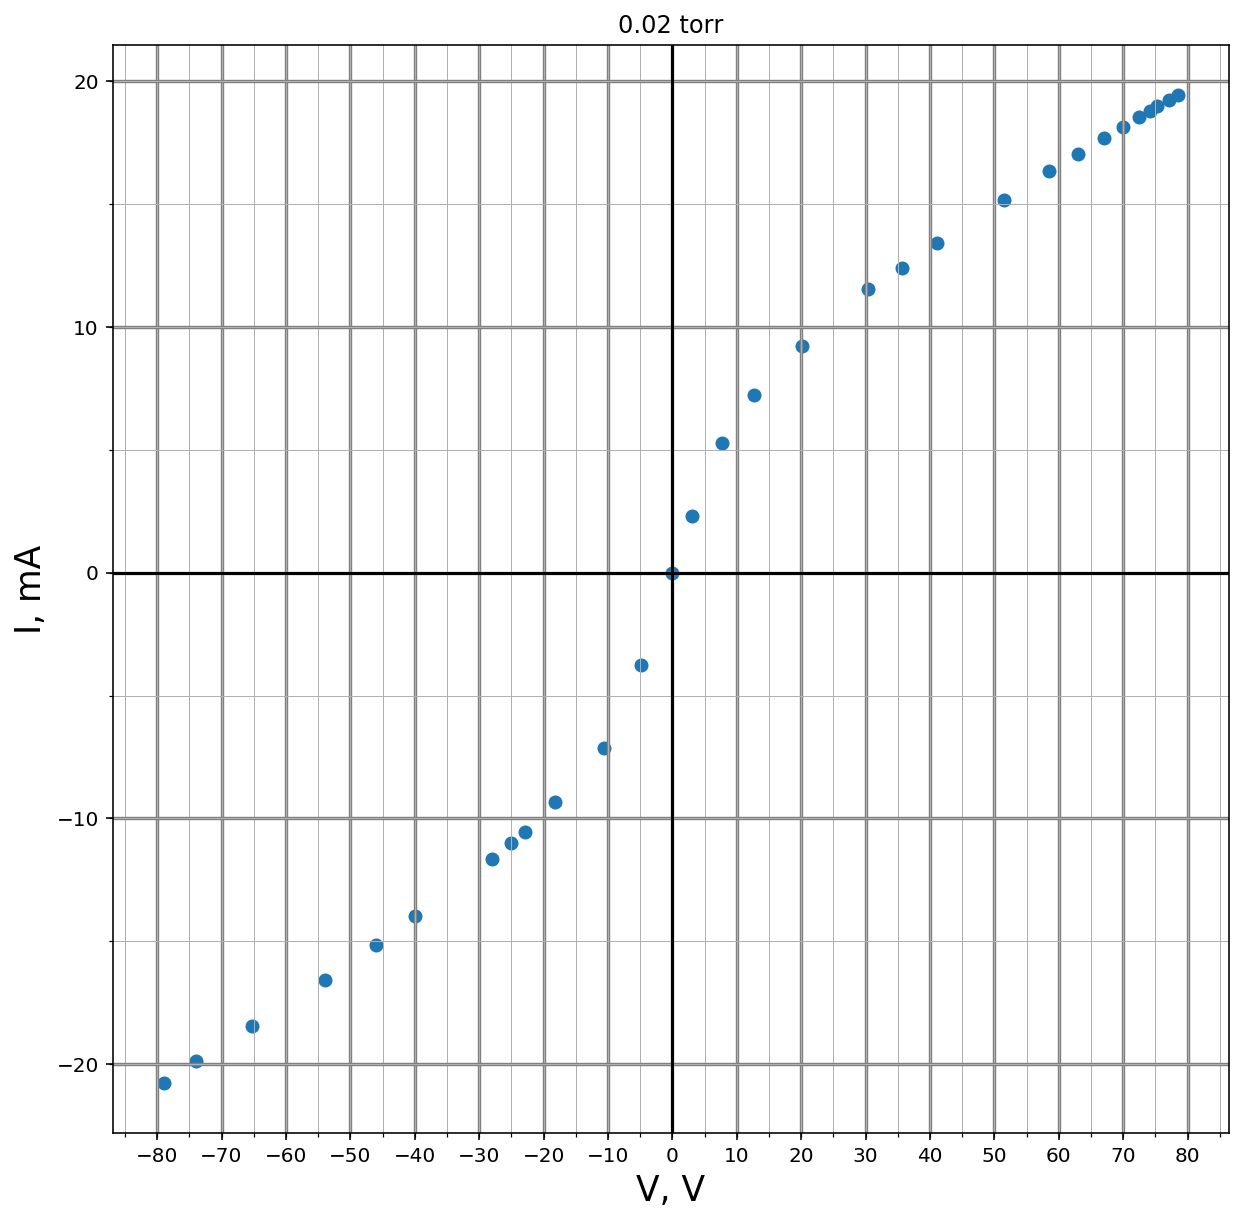

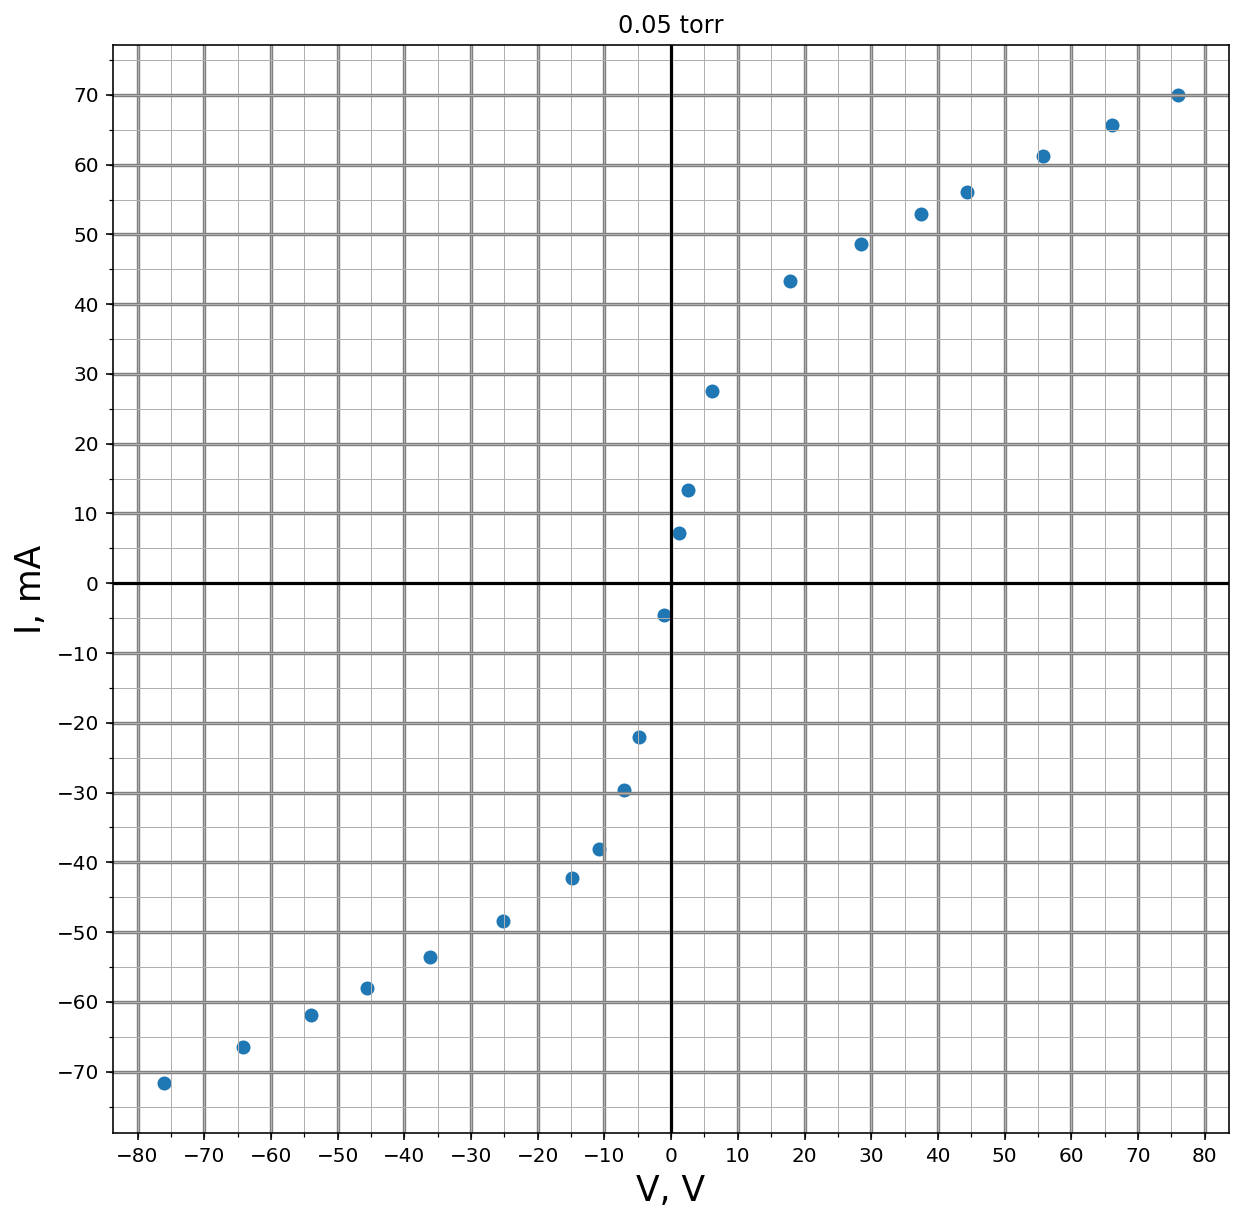

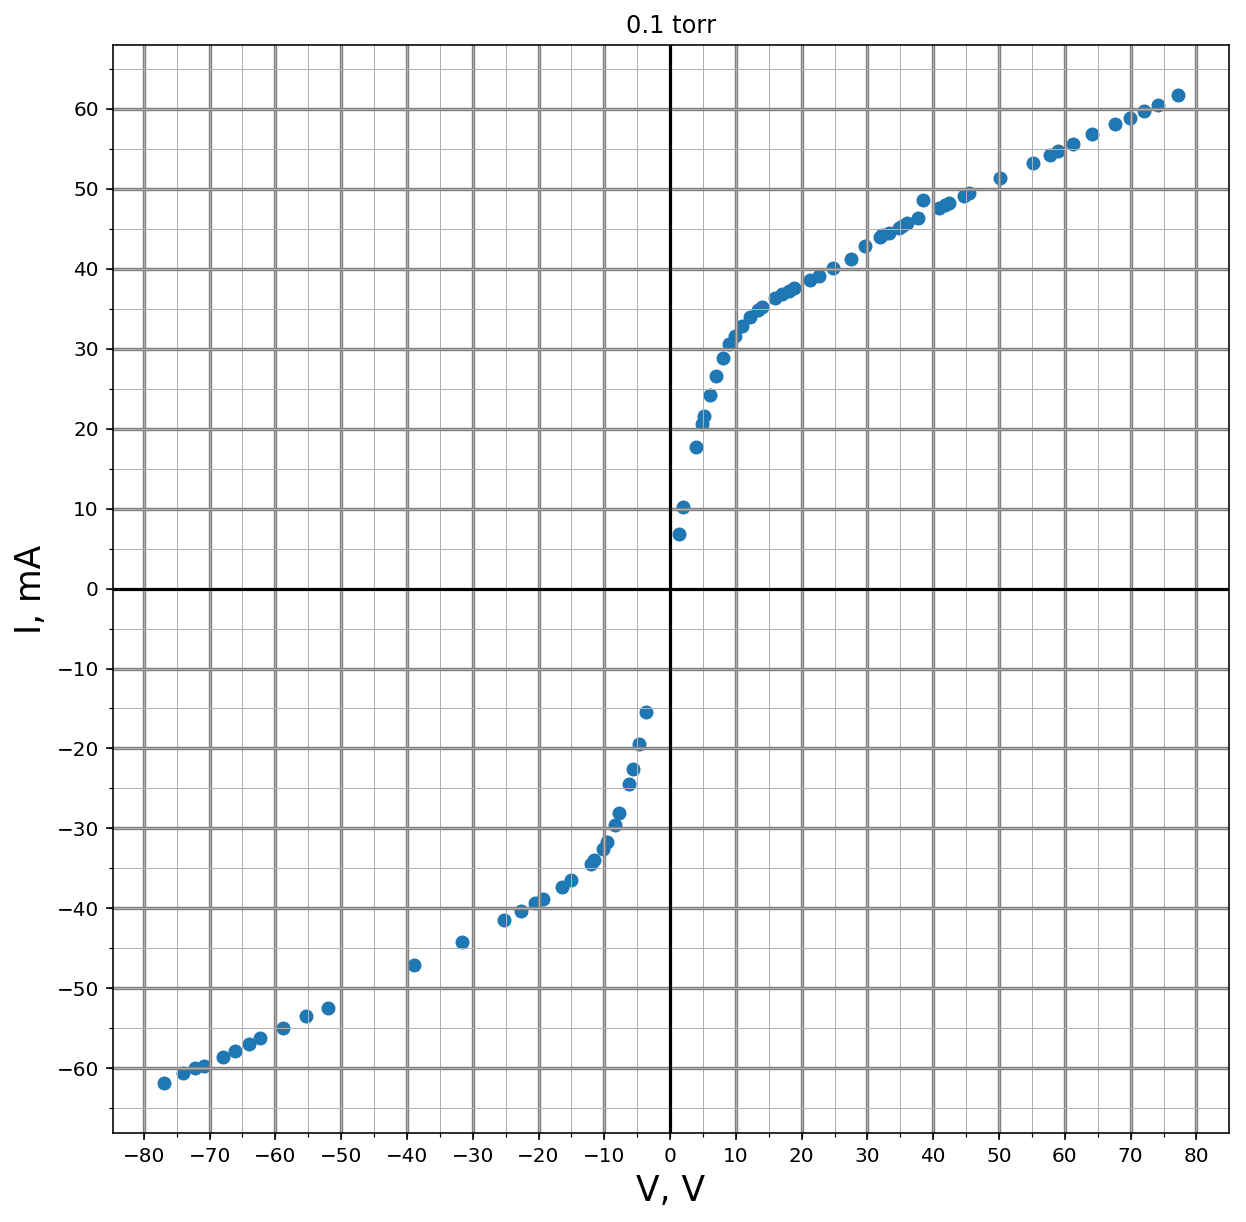

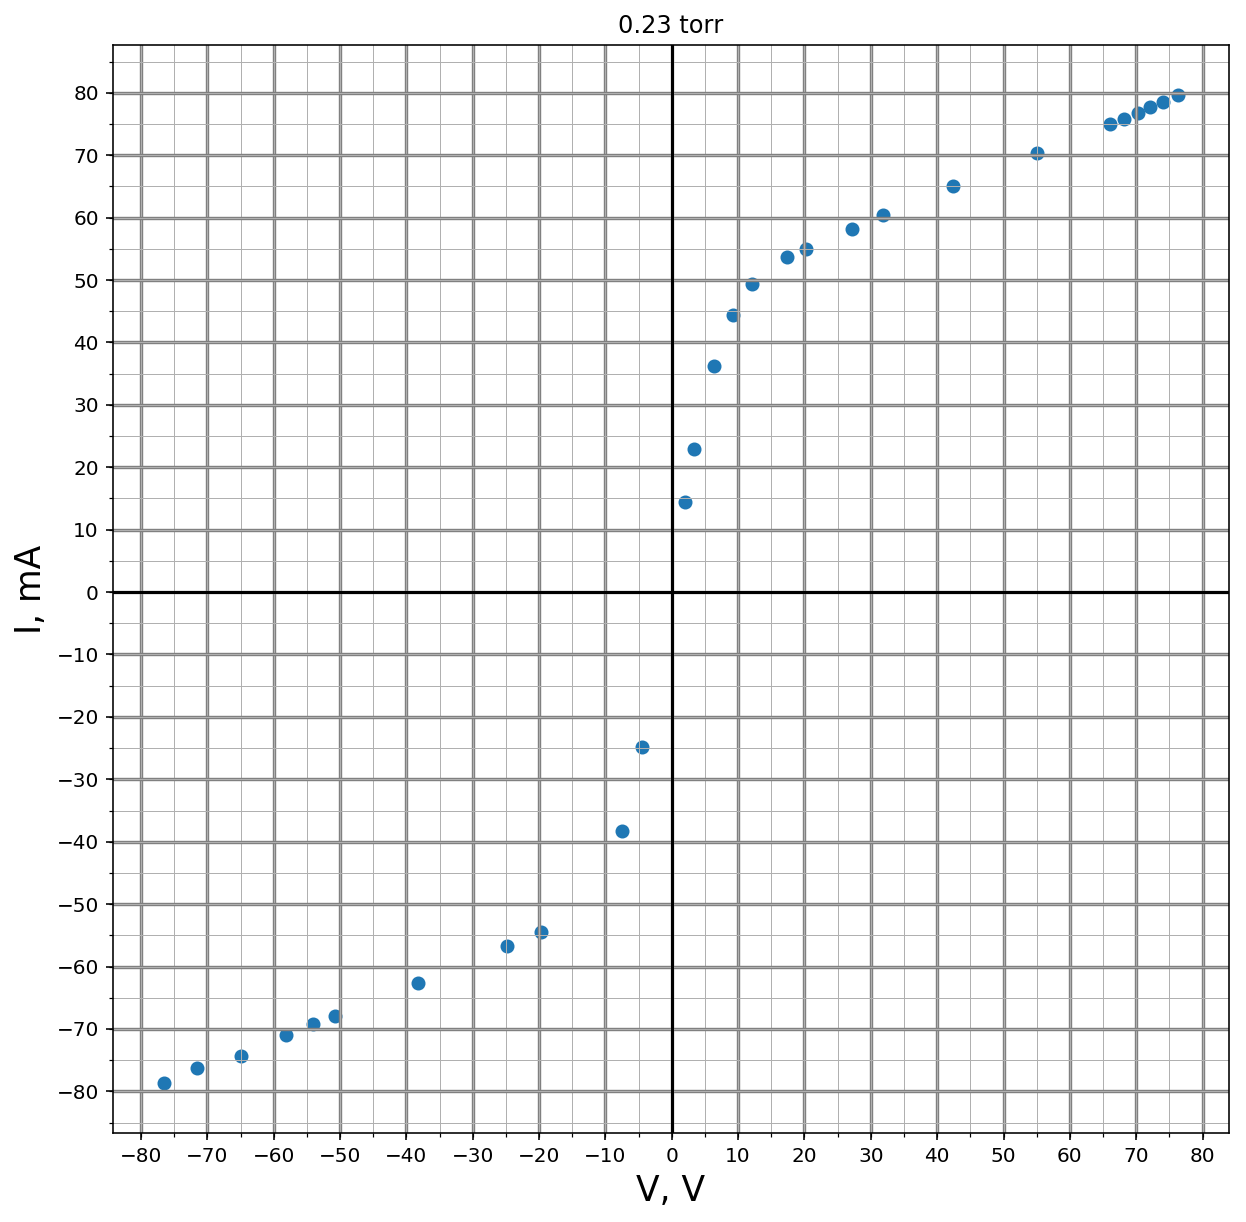

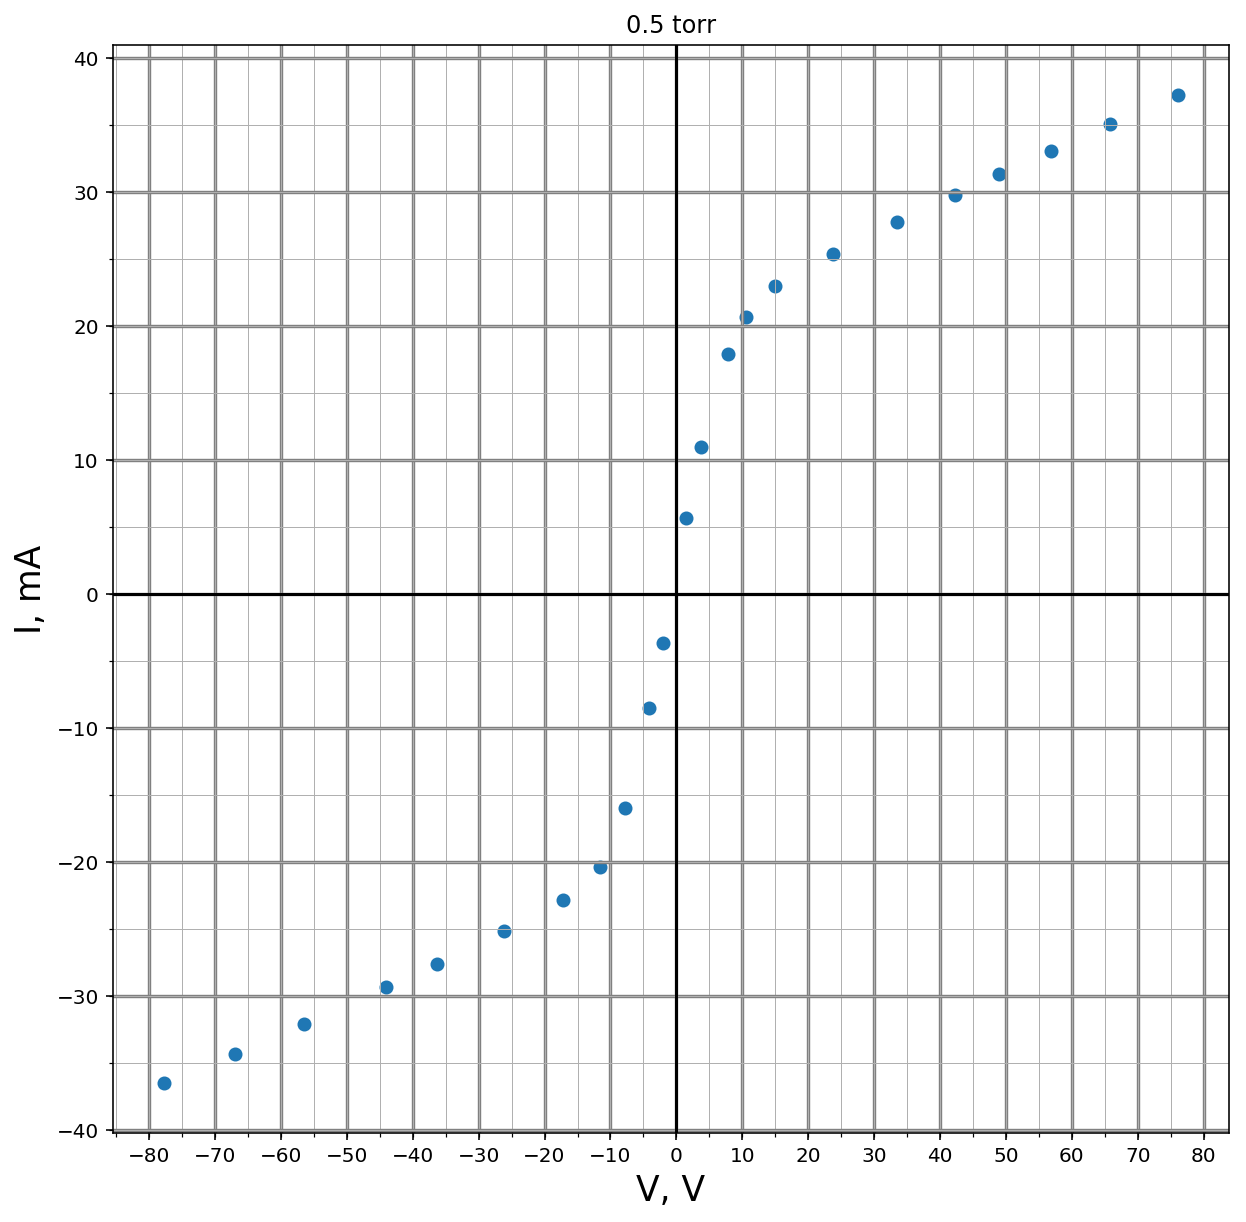

In [142]:
for i in range(len(vac)):
    plt.figure(figsize=(10, 10))
    plt.scatter(vac[i][:, 0], vac[i][:, 1]*10**6)
    plt.title('{} torr'.format(pressure[i]))
    plt.ylabel('I, mA', fontsize='xx-large')
    plt.xlabel('V, V', fontsize='xx-large')
   
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
    plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
    plt.grid(True, which='minor', linewidth = 0.5)

In [82]:
def func(x, k):
    return x*k
def func_ion(x, k, b):
    return k * x + b

In [201]:
k_dk = [[] for i in range(len(pressure))]
i1_di1 = [[] for i in range(len(pressure))]
i2_di2 = [[] for i in range(len(pressure))]
deri1_dderi1 = [[] for i in range(len(pressure))]
deri2_dderi2 = [[] for i in range(len(pressure))]

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


P = 0.014 torr
k = 4.385282756271177 mA/V
dk = 0.00375467817154065 mA/V
ion1 = -38.76839781126881 mA
dion1 = 0.04653161632198192 mA
ion2 = 37.69623848130684 mA
dion2 = 0.11081383940469897 mA


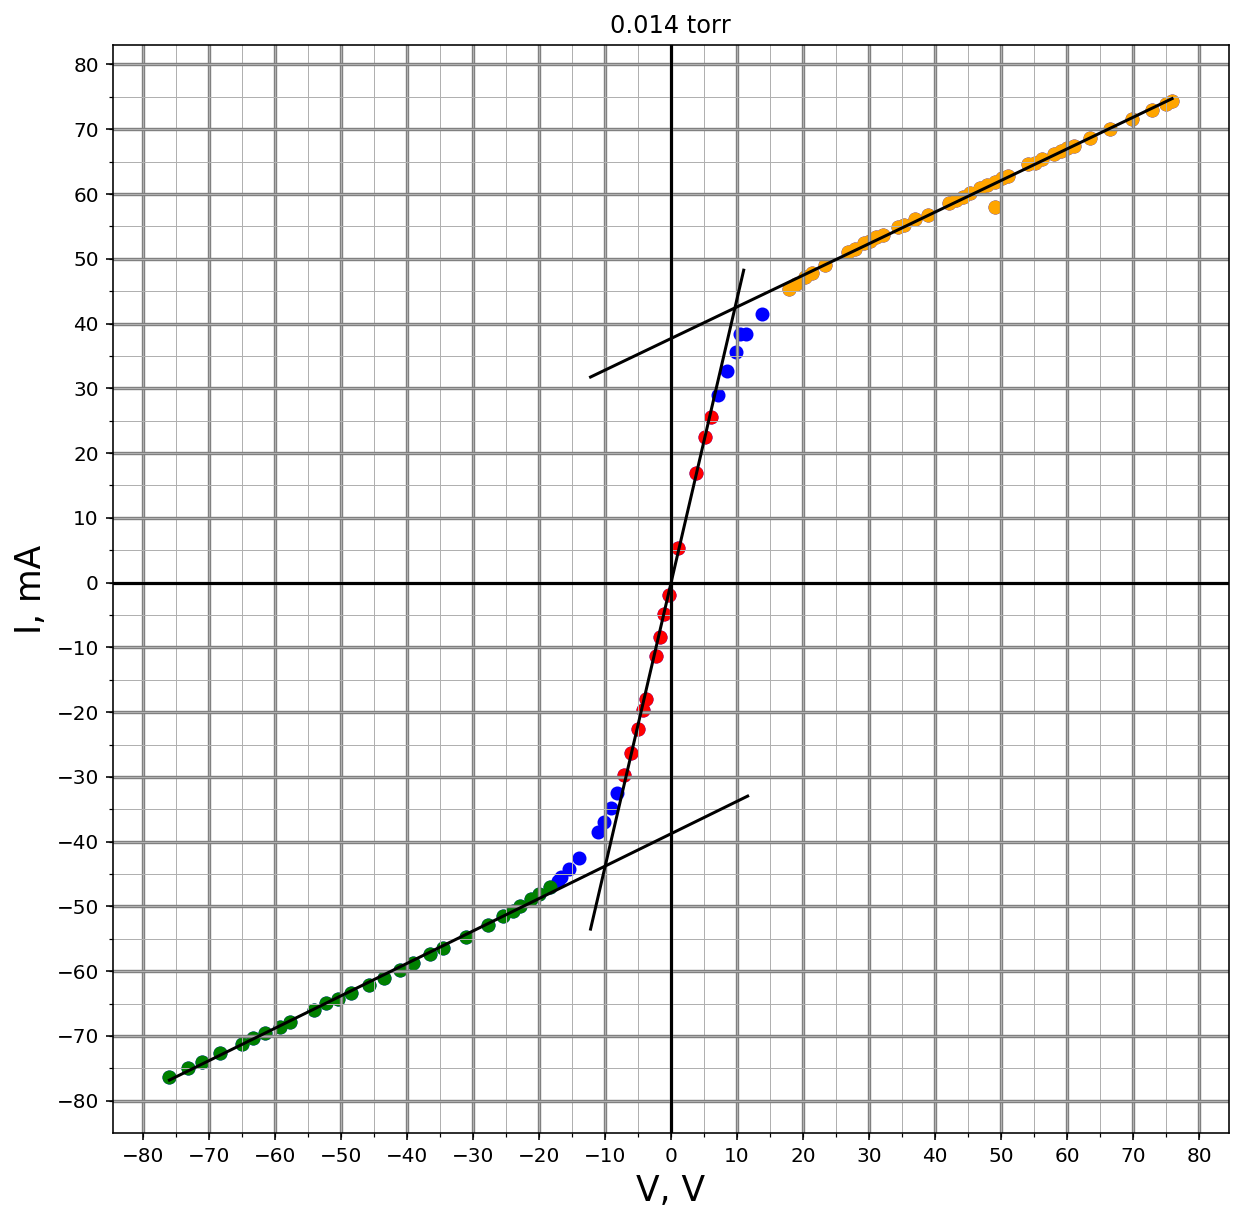

In [202]:
i = 0
plt.figure(figsize=(10, 10))

nmin, nmax = 35, 47
plt.scatter(vac[i][:, 0], vac[i][:, 1]*10**6, color='blue')
plt.scatter(vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6, color='red')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
plt.grid(True, which='minor', linewidth = 0.5)

popt, pcov = curve_fit(func, vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin, 0]-5, vac[i][nmax, 0]+5)
plt.plot(x_curve, func(x_curve, popt), color='black', linewidth=1.5)

print('P = {} torr'.format(pressure[i]))
print('k = {} mA/V'.format(popt[0]))
print('dk = {} mA/V'.format(pcov[0][0]))
k_dk[i] = [popt[0], pcov[0][0]]

nmin_ion1 , nmax_ion1 = 0, 26
plt.scatter(vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6, color='green')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion1, 0], vac[i][nmax_ion1, 0]+30)
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion1 = {} mA'.format(popt[1]))
print('dion1 = {} mA'.format(pcov[1, 1]))
i1_di1[i] = [popt[1], pcov[1, 1]]
deri1_dderi1[i] = [popt[0], pcov[0, 0]]

nmin_ion2 , nmax_ion2 = 54, 91
plt.scatter(vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6, color='orange')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion2, 0]-30, vac[i][nmax_ion2, 0])
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion2 = {} mA'.format(popt[1]))
print('dion2 = {} mA'.format(pcov[1, 1]))
i2_di2[i] = [popt[1], pcov[1, 1]]
deri2_dderi2[i] = [popt[0], pcov[0, 0]]
               
plt.title('{} torr'.format(pressure[i]))
plt.ylabel('I, mA', fontsize='xx-large')
plt.xlabel('V, V', fontsize='xx-large')

plt.savefig('{}torr.png'.format(pressure[i]), dpi=300)

P = 0.02 torr
k = 0.7146323329771194 mA/V
dk = 0.0005588318581438031 mA/V
ion1 = -6.571053353293794 mA
dion1 = 0.023034974627864514 mA
ion2 = 6.6100212530341595 mA
dion2 = 0.006413969872691269 mA


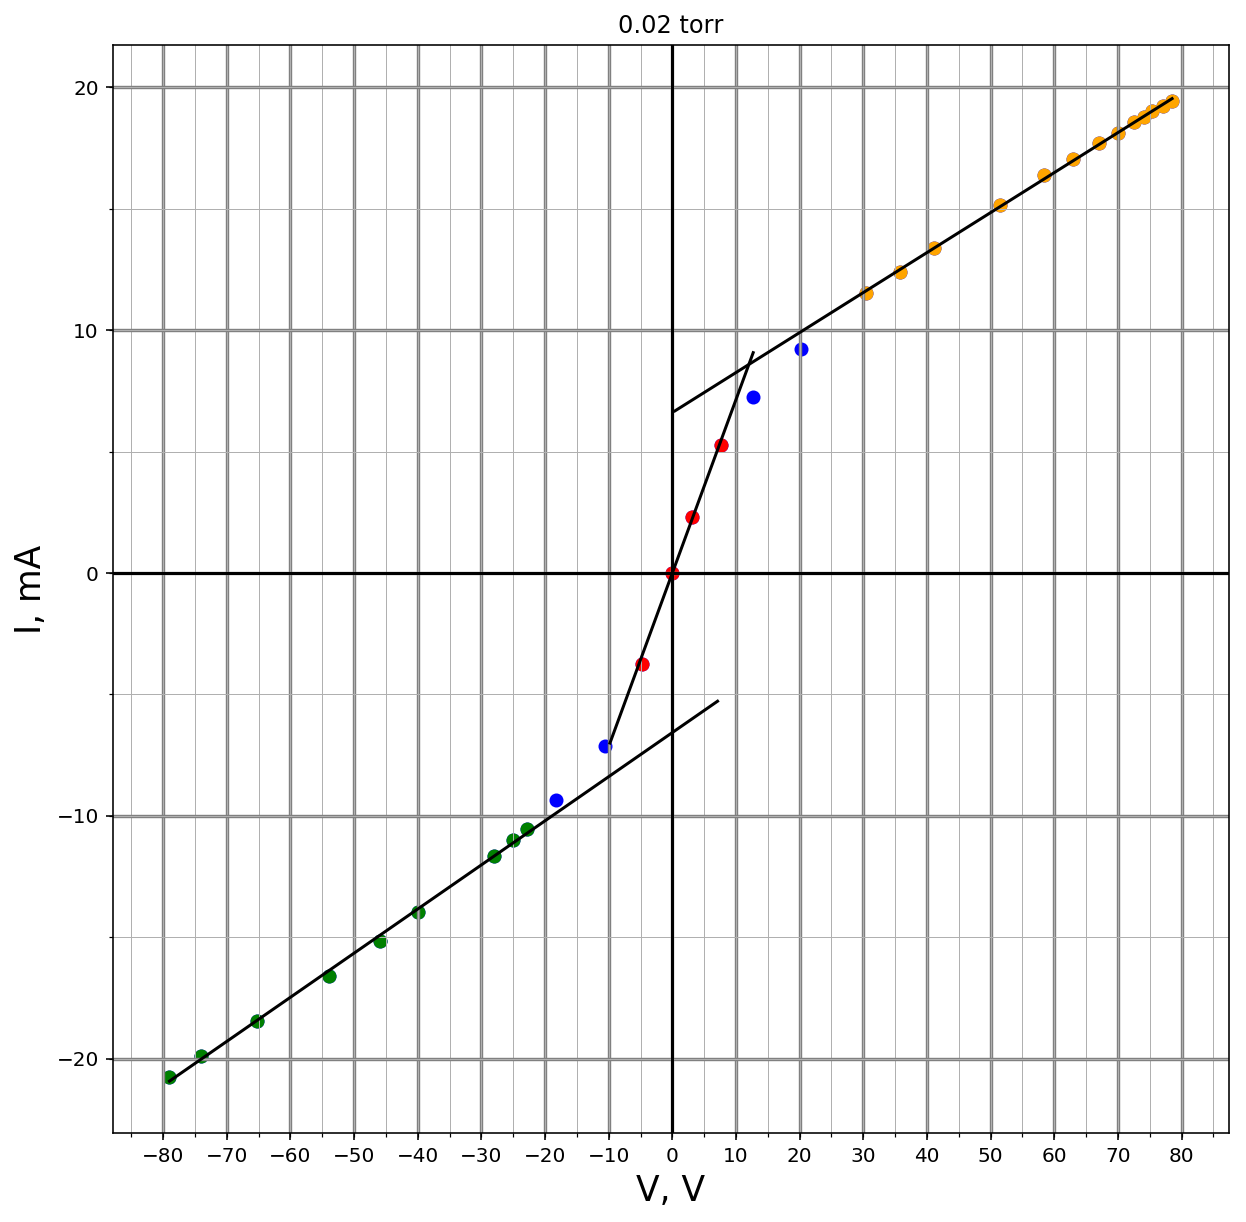

In [203]:
i = 1
plt.figure(figsize=(10, 10))

nmin, nmax = 11, 14
plt.scatter(vac[i][:, 0], vac[i][:, 1]*10**6, color='blue')
plt.scatter(vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6, color='red')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
plt.grid(True, which='minor', linewidth = 0.5)

popt, pcov = curve_fit(func, vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin, 0]-5, vac[i][nmax, 0]+5)
plt.plot(x_curve, func(x_curve, popt), color='black', linewidth=1.5)

print('P = {} torr'.format(pressure[i]))
print('k = {} mA/V'.format(popt[0]))
print('dk = {} mA/V'.format(pcov[0][0]))
k_dk[i] = [popt[0], pcov[0][0]]

nmin_ion1 , nmax_ion1 = 0, 8
plt.scatter(vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6, color='green')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion1, 0], vac[i][nmax_ion1, 0]+30)
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion1 = {} mA'.format(popt[1]))
print('dion1 = {} mA'.format(pcov[1, 1]))
i1_di1[i] = [popt[1], pcov[1, 1]]
deri1_dderi1[i] = [popt[0], pcov[0, 0]]

nmin_ion2 , nmax_ion2 = 17, 29
plt.scatter(vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6, color='orange')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion2, 0]-30, vac[i][nmax_ion2, 0])
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion2 = {} mA'.format(popt[1]))
print('dion2 = {} mA'.format(pcov[1, 1]))
i2_di2[i] = [popt[1], pcov[1, 1]]
deri2_dderi2[i] = [popt[0], pcov[0, 0]]

plt.title('{} torr'.format(pressure[i]))
plt.ylabel('I, mA', fontsize='xx-large')
plt.xlabel('V, V', fontsize='xx-large')
plt.savefig('{}torr.png'.format(pressure[i]), dpi=300)

P = 0.05 torr
k = 5.285837757430924 mA/V
dk = 0.13426497520888106 mA/V
ion1 = -36.073354850924964 mA
dion1 = 0.22209405730020773 mA
ion2 = 35.47952717980072 mA
dion2 = 0.07757475428720806 mA


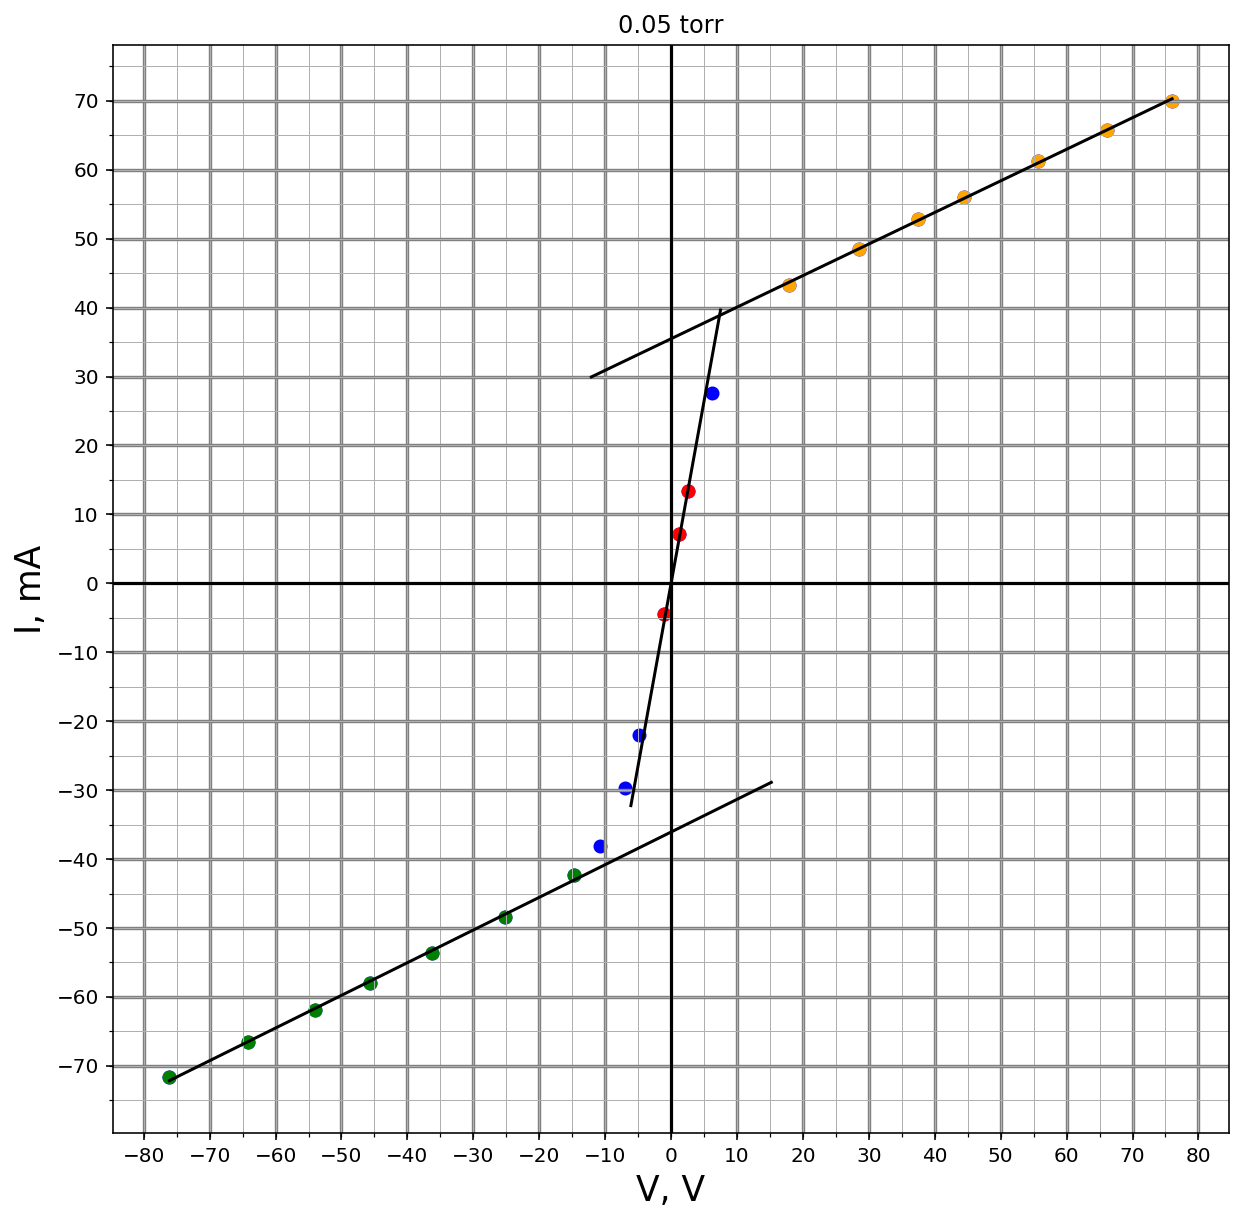

In [204]:
i = 2
plt.figure(figsize=(10, 10))

nmin, nmax = 10, 12
plt.scatter(vac[i][:, 0], vac[i][:, 1]*10**6, color='blue')
plt.scatter(vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6, color='red')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
plt.grid(True, which='minor', linewidth = 0.5)

popt, pcov = curve_fit(func, vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin, 0]-5, vac[i][nmax, 0]+5)
plt.plot(x_curve, func(x_curve, popt), color='black', linewidth=1.5)

print('P = {} torr'.format(pressure[i]))
print('k = {} mA/V'.format(popt[0]))
print('dk = {} mA/V'.format(pcov[0][0]))
k_dk[i] = [popt[0], pcov[0][0]]

nmin_ion1 , nmax_ion1 = 0, 6
plt.scatter(vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6, color='green')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion1, 0], vac[i][nmax_ion1, 0]+30)
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion1 = {} mA'.format(popt[1]))
print('dion1 = {} mA'.format(pcov[1, 1]))
i1_di1[i] = [popt[1], pcov[1, 1]]
deri1_dderi1[i] = [popt[0], pcov[0, 0]]

nmin_ion2 , nmax_ion2 = 14, 20
plt.scatter(vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6, color='orange')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion2, 0]-30, vac[i][nmax_ion2, 0])
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion2 = {} mA'.format(popt[1]))
print('dion2 = {} mA'.format(pcov[1, 1]))
i2_di2[i] = [popt[1], pcov[1, 1]]
deri2_dderi2[i] = [popt[0], pcov[0, 0]]

plt.title('{} torr'.format(pressure[i]))
plt.ylabel('I, mA', fontsize='xx-large')
plt.xlabel('V, V', fontsize='xx-large')
plt.savefig('{}torr.png'.format(pressure[i]), dpi=300)

P = 0.1 torr
k = 4.192132416947548 mA/V
dk = 0.021765483469553332 mA/V
ion1 = -31.046504025514427 mA
dion1 = 0.022421164679306698 mA
ion2 = 30.381393048603854 mA
dion2 = 0.07075173620099852 mA


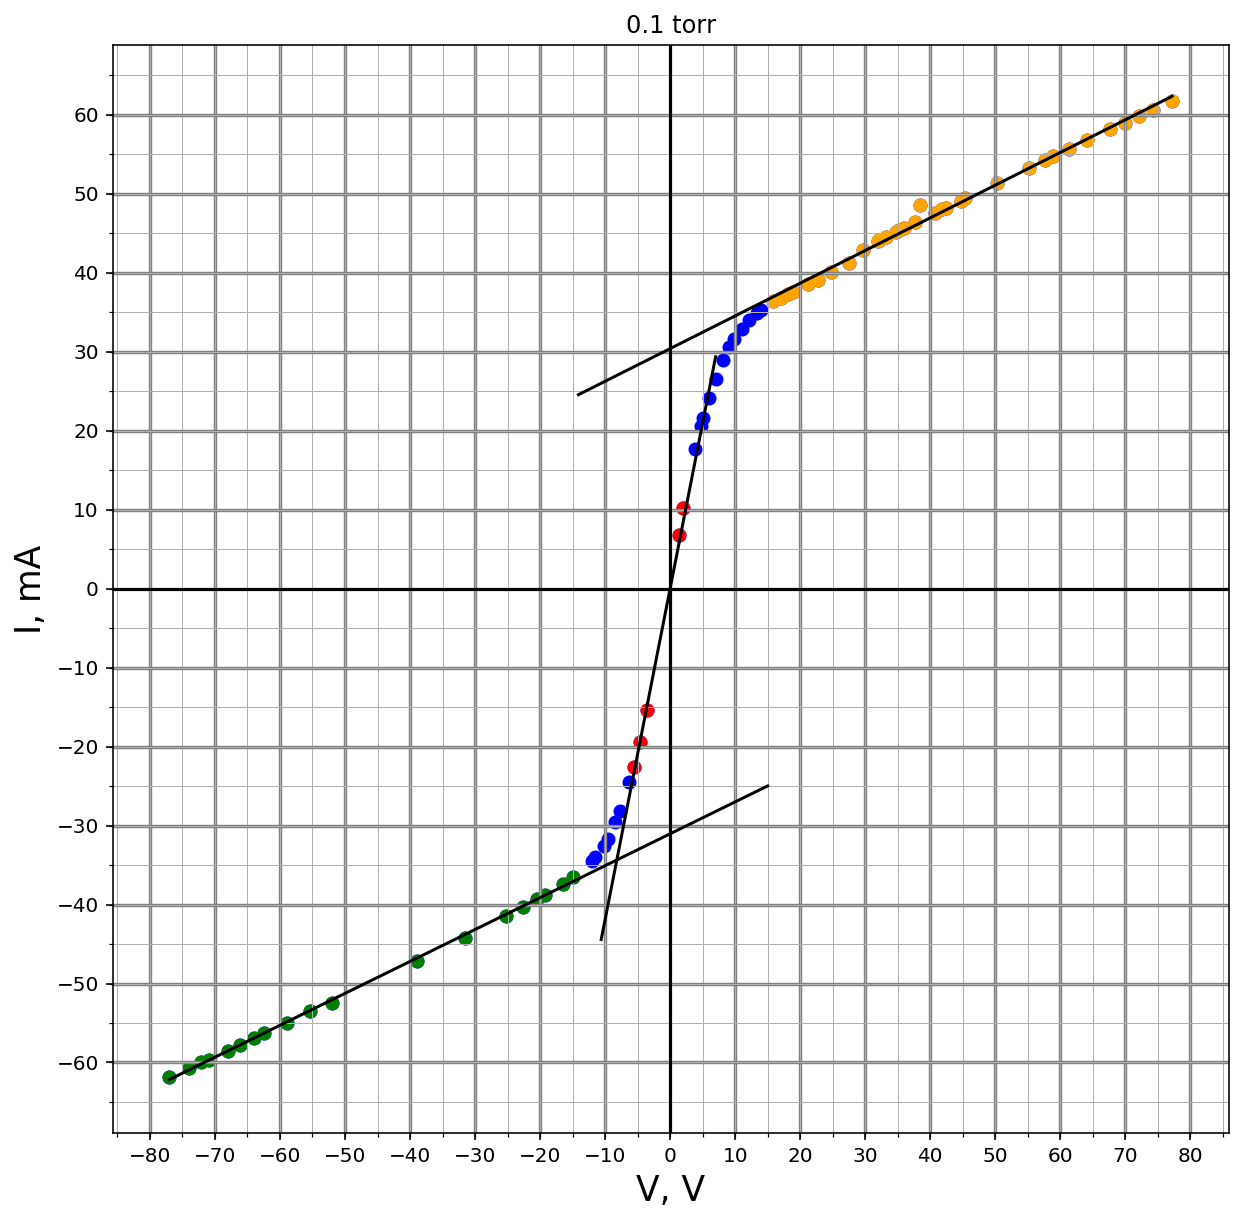

In [205]:
i = 3
plt.figure(figsize=(10, 10))

nmin, nmax = 26, 30
plt.scatter(vac[i][:, 0], vac[i][:, 1]*10**6, color='blue')
plt.scatter(vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6, color='red')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
plt.grid(True, which='minor', linewidth = 0.5)

popt, pcov = curve_fit(func, vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin, 0]-5, vac[i][nmax, 0]+5)
plt.plot(x_curve, func(x_curve, popt), color='black', linewidth=1.5)

print('P = {} torr'.format(pressure[i]))
print('k = {} mA/V'.format(popt[0]))
print('dk = {} mA/V'.format(pcov[0][0]))
k_dk[i] = [popt[0], pcov[0][0]]

nmin_ion1 , nmax_ion1 = 0, 18

plt.scatter(vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6, color='green')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion1, 0], vac[i][nmax_ion1, 0]+30)
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion1 = {} mA'.format(popt[1]))
print('dion1 = {} mA'.format(pcov[1, 1]))
i1_di1[i] = [popt[1], pcov[1, 1]]
deri1_dderi1[i] = [popt[0], pcov[0, 0]]

nmin_ion2 , nmax_ion2 = 43, 75
plt.scatter(vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6, color='orange')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion2, 0]-30, vac[i][nmax_ion2, 0])
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion2 = {} mA'.format(popt[1]))
print('dion2 = {} mA'.format(pcov[1, 1]))
i2_di2[i] = [popt[1], pcov[1, 1]]
deri2_dderi2[i] = [popt[0], pcov[0, 0]]

plt.title('{} torr'.format(pressure[i]))
plt.ylabel('I, mA', fontsize='xx-large')
plt.xlabel('V, V', fontsize='xx-large')
plt.savefig('{}torr.png'.format(pressure[i]), dpi=300)

P = 0.23 torr
k = 6.105483460577796 mA/V
dk = 0.23201118163942364 mA/V
ion1 = -46.18947987656818 mA
dion1 = 0.07264072181936532 mA
ion2 = 46.3348425917675 mA
dion2 = 0.01689339964998536 mA


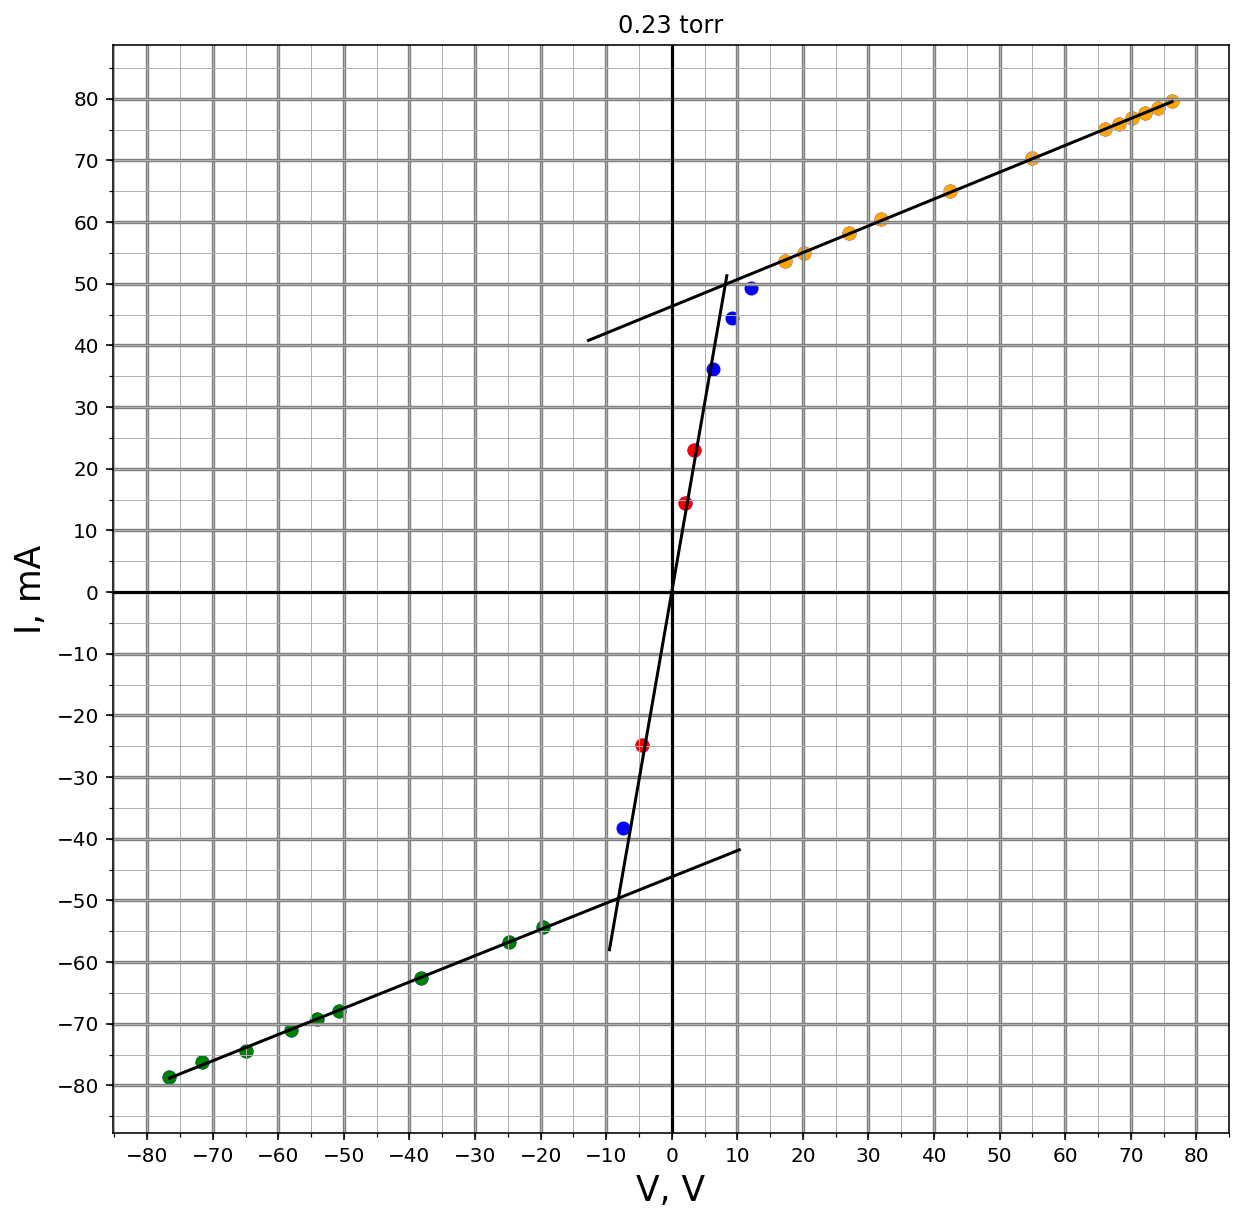

In [206]:
i = 4
plt.figure(figsize=(10, 10))

nmin, nmax = 10, 12
plt.scatter(vac[i][:, 0], vac[i][:, 1]*10**6, color='blue')
plt.scatter(vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6, color='red')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
plt.grid(True, which='minor', linewidth = 0.5)

popt, pcov = curve_fit(func, vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin, 0]-5, vac[i][nmax, 0]+5)
plt.plot(x_curve, func(x_curve, popt), color='black', linewidth=1.5)

print('P = {} torr'.format(pressure[i]))
print('k = {} mA/V'.format(popt[0]))
print('dk = {} mA/V'.format(pcov[0][0]))
k_dk[i] = [popt[0], pcov[0][0]]

nmin_ion1 , nmax_ion1 = 0, 8
plt.scatter(vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6, color='green')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion1, 0], vac[i][nmax_ion1, 0]+30)
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion1 = {} mA'.format(popt[1]))
print('dion1 = {} mA'.format(pcov[1, 1]))
i1_di1[i] = [popt[1], pcov[1, 1]]
deri1_dderi1[i] = [popt[0], pcov[0, 0]]

nmin_ion2 , nmax_ion2 = 16, 27
plt.scatter(vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6, color='orange')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion2, 0]-30, vac[i][nmax_ion2, 0])
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion2 = {} mA'.format(popt[1]))
print('dion2 = {} mA'.format(pcov[1, 1]))
i2_di2[i] = [popt[1], pcov[1, 1]]
deri2_dderi2[i] = [popt[0], pcov[0, 0]]

plt.title('{} torr'.format(pressure[i]))
plt.ylabel('I, mA', fontsize='xx-large')
plt.xlabel('V, V', fontsize='xx-large')
plt.savefig('{}torr.png'.format(pressure[i]), dpi=300)

P = 0.5 torr
k = 2.746211133044862 mA/V
dk = 0.17612924832291807 mA/V
ion1 = -19.292887821319404 mA
dion1 = 0.03936573660829654 mA
ion2 = 19.84564150114628 mA
dion2 = 0.032494435370782074 mA


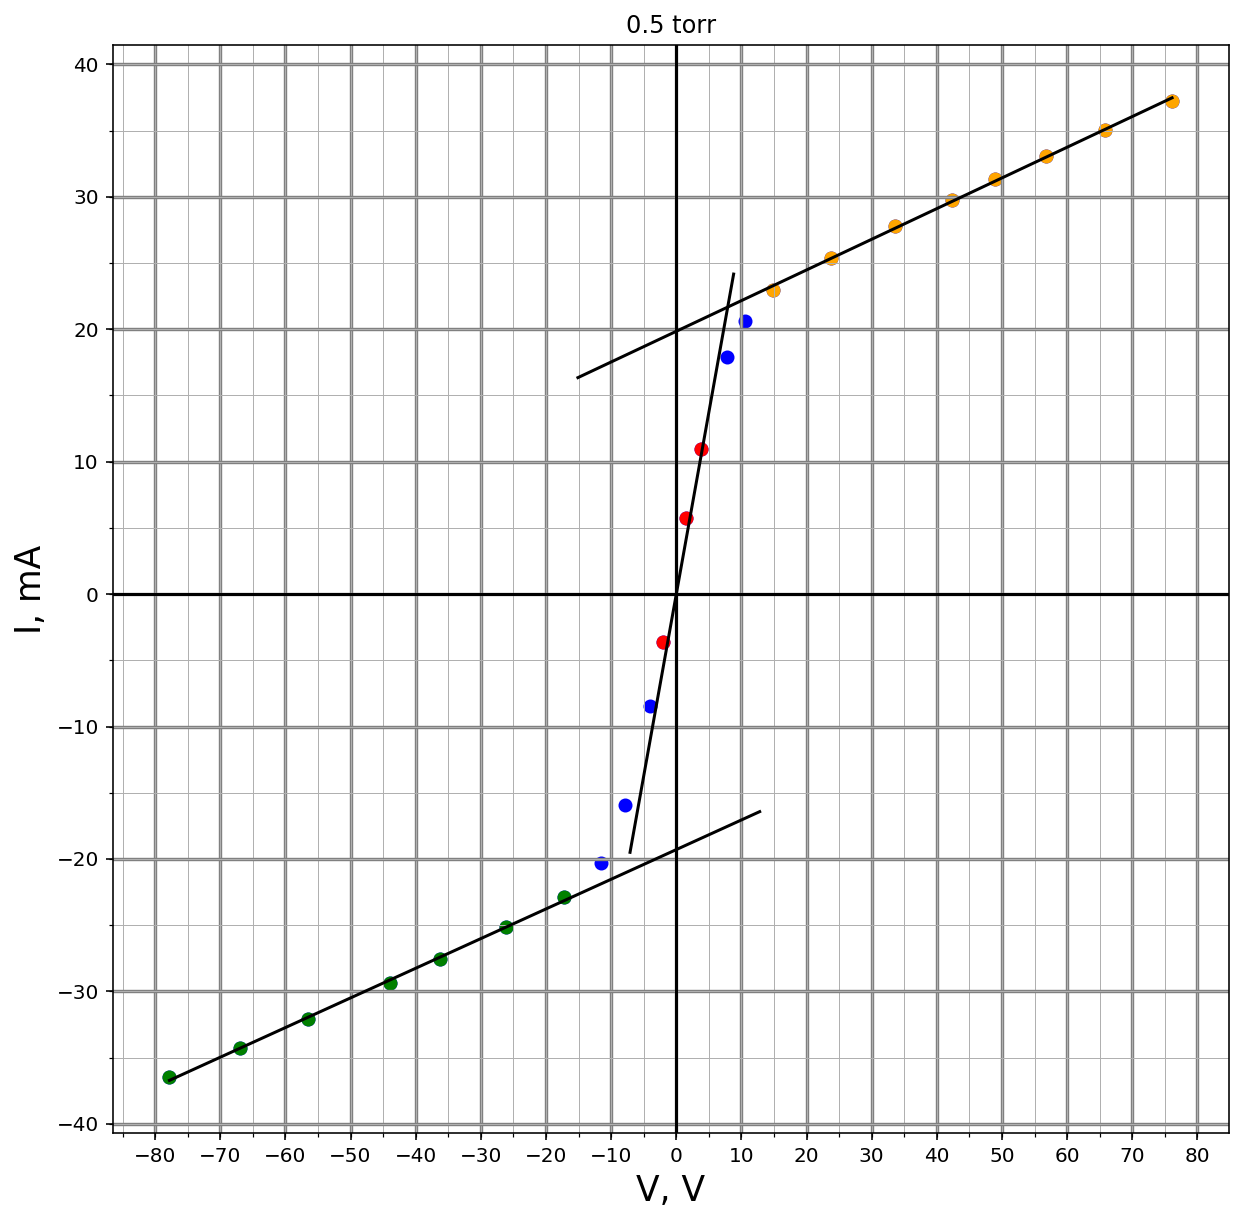

In [207]:
i = 5
plt.figure(figsize=(10, 10))

nmin, nmax = 10, 12
plt.scatter(vac[i][:, 0], vac[i][:, 1]*10**6, color='blue')
plt.scatter(vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6, color='red')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
plt.grid(True, which='minor', linewidth = 0.5)

popt, pcov = curve_fit(func, vac[i][nmin:nmax+1, 0], vac[i][nmin:nmax+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin, 0]-5, vac[i][nmax, 0]+5)
plt.plot(x_curve, func(x_curve, popt), color='black', linewidth=1.5)

print('P = {} torr'.format(pressure[i]))
print('k = {} mA/V'.format(popt[0]))
print('dk = {} mA/V'.format(pcov[0][0]))
k_dk[i] = [popt[0], pcov[0][0]]

nmin_ion1 , nmax_ion1 = 0, 6
plt.scatter(vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6, color='green')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion1:nmax_ion1+1, 0], vac[i][nmin_ion1:nmax_ion1+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion1, 0], vac[i][nmax_ion1, 0]+30)
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion1 = {} mA'.format(popt[1]))
print('dion1 = {} mA'.format(pcov[1, 1]))
i1_di1[i] = [popt[1], pcov[1, 1]]
deri1_dderi1[i] = [popt[0], pcov[0, 0]]

nmin_ion2 , nmax_ion2 = 15, 22
plt.scatter(vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6, color='orange')

popt, pcov = curve_fit(func_ion, vac[i][nmin_ion2:nmax_ion2+1, 0], vac[i][nmin_ion2:nmax_ion2+1, 1]*10**6)
x_curve = np.linspace(vac[i][nmin_ion2, 0]-30, vac[i][nmax_ion2, 0])
plt.plot(x_curve, func_ion(x_curve, popt[0], popt[1]), color='black', linewidth=1.5)

print('ion2 = {} mA'.format(popt[1]))
print('dion2 = {} mA'.format(pcov[1, 1]))
i2_di2[i] = [popt[1], pcov[1, 1]]
deri2_dderi2[i] = [popt[0], pcov[0, 0]]

plt.title('{} torr'.format(pressure[i]))
plt.ylabel('I, mA', fontsize='xx-large')
plt.xlabel('V, V', fontsize='xx-large')
plt.savefig('{}torr.png'.format(pressure[i]), dpi=300)

In [233]:
k_dk = np.array(k_dk)
k_dk

array([[4.38528276e+00, 3.75467817e-03],
       [7.14632333e-01, 5.58831858e-04],
       [5.28583776e+00, 1.34264975e-01],
       [4.19213242e+00, 2.17654835e-02],
       [6.10548346e+00, 2.32011182e-01],
       [2.74621113e+00, 1.76129248e-01]])

In [216]:
i1_di1 = np.array(i1_di1)
i1_di1

array([[-3.87683978e+01,  4.65316163e-02],
       [-6.57105335e+00,  2.30349746e-02],
       [-3.60733549e+01,  2.22094057e-01],
       [-3.10465040e+01,  2.24211647e-02],
       [-4.61894799e+01,  7.26407218e-02],
       [-1.92928878e+01,  3.93657366e-02]])

In [218]:
deri1_dderi1 = np.array(deri1_dderi1)
deri1_dderi1

array([[5.00535595e-01, 1.94263668e-05],
       [1.81756907e-01, 8.45400823e-06],
       [4.73882342e-01, 9.10609129e-05],
       [4.04039777e-01, 8.06458079e-06],
       [4.26026307e-01, 2.46104864e-05],
       [2.23990096e-01, 1.53503097e-05]])

In [219]:
i2_di2 = np.array(i2_di2)
i2_di2

array([[3.76962385e+01, 1.10813839e-01],
       [6.61002125e+00, 6.41396987e-03],
       [3.54795272e+01, 7.75747543e-02],
       [3.03813930e+01, 7.07517362e-02],
       [4.63348426e+01, 1.68933996e-02],
       [1.98456415e+01, 3.24944354e-02]])

In [220]:
deri2_dderi2 = np.array(deri2_dderi2)
deri2_dderi2

array([[4.87923125e-01, 4.78684291e-05],
       [1.64715468e-01, 1.60867487e-06],
       [4.58084716e-01, 3.05920335e-05],
       [4.13804001e-01, 3.34184815e-05],
       [4.35071243e-01, 5.37129537e-06],
       [2.31691245e-01, 1.33766408e-05]])

In [261]:
e = 1.60 * 10**(-19) #charge of electron in coloumb
k_b = 1.38 * 10**(-23) #const Boltzman in SI
m_e = 9.1 * 10**(-31) #mass of electron in kg

In [256]:
pressure

[0.014, 0.02, 0.05, 0.1, 0.23, 0.5]

In [230]:
T1 = e / k_b * i2_di2[:, 0] / ((-deri2_dderi2[:, 0]) - 2 * (-k_dk[:, 0]))
T1

array([52767.92321059, 60604.93942736, 40673.66824016, 44194.18685057,
       45619.93252862, 43738.10280106])

In [282]:
deltaT1 = (T1 * i2_di2[:, 1] / i2_di2[:, 0])**2 \
            + (T1 / ((-deri2_dderi2[:, 0]) - 2 * (-k_dk[:, 0])) * deri2_dderi2[:, 1])**2 \
                + (T1 / ((-deri2_dderi2[:, 0]) - 2 * (-k_dk[:, 0])) * 2 * k_dk[:, 1])**2
deltaT1 = np.sqrt(deltaT1)

<ErrorbarContainer object of 3 artists>

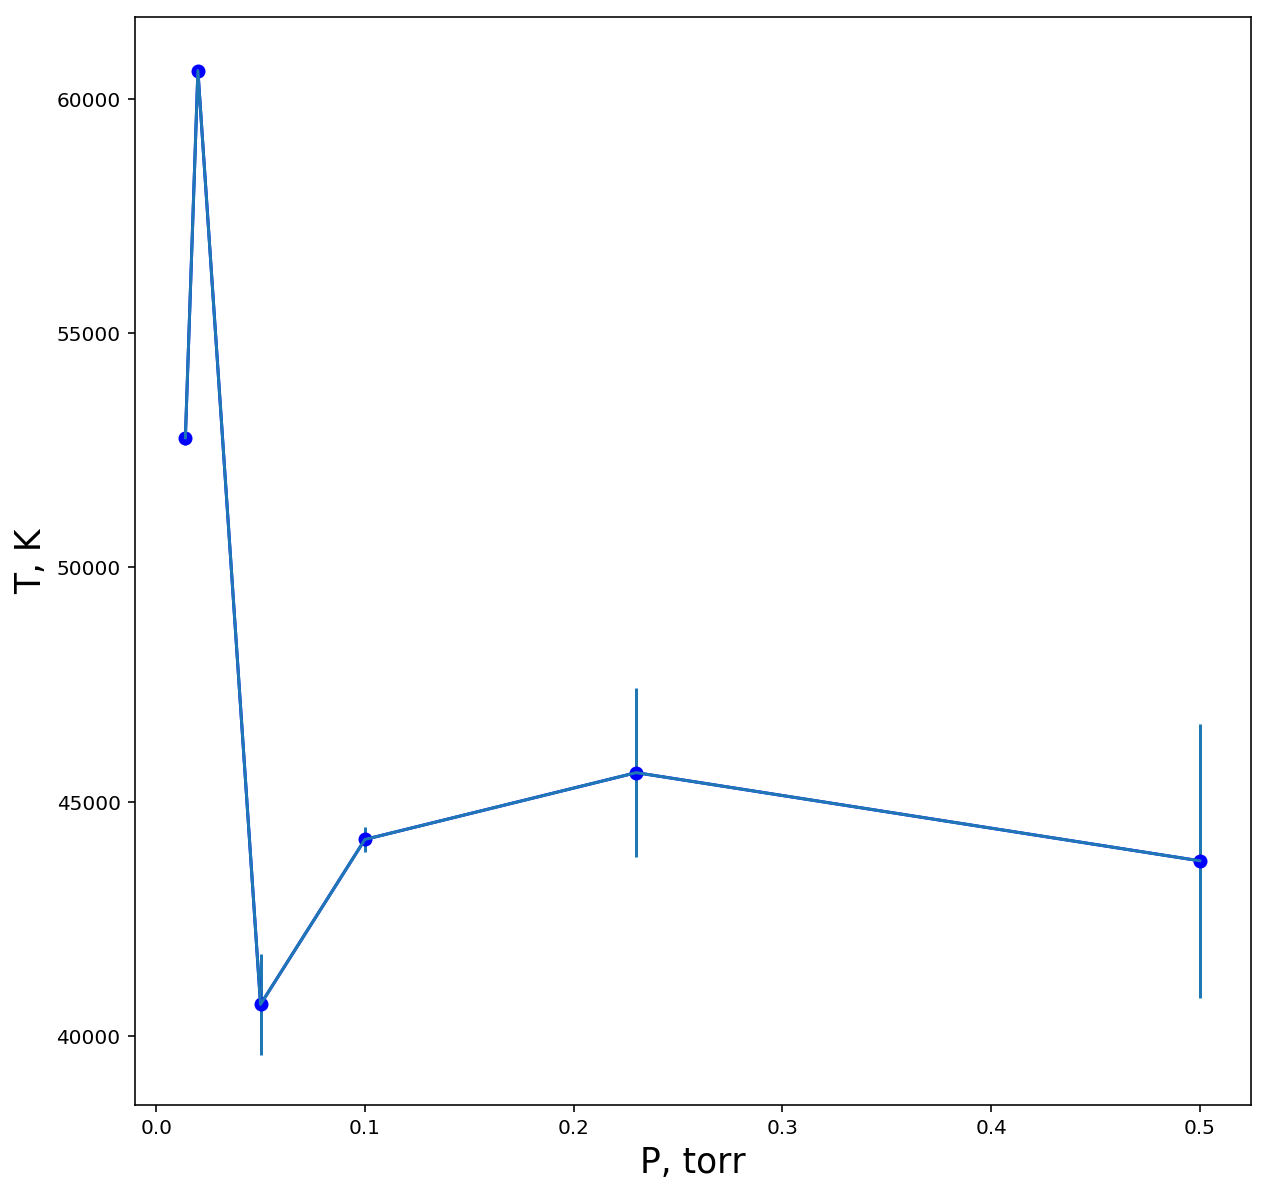

In [284]:
plt.figure(figsize=(10, 10))
plt.plot(pressure, T1, 'b', marker='o')
plt.ylabel('T, K', fontsize='xx-large')
plt.xlabel('P, torr', fontsize='xx-large')
plt.errorbar(pressure, T1, yerr=deltaT1)

In [285]:
ne = i2_di2[:, 0] * 10**(-6) / (e * np.sqrt(k_b * T1 / 2 / np.pi / m_e))

In [266]:
ne

array([6.60182670e+08, 1.08018950e+08, 7.07737581e+08, 5.81401588e+08,
       8.72733159e+08, 3.81756355e+08])

In [288]:
delta_ne = (ne / i2_di2[:, 0] * i2_di2[:, 1])**2 \
            + (ne / 2 / T1 * deltaT1)**2
delta_ne = np.sqrt(delta_ne)

In [289]:
delta_ne / 10**8

array([0.0219032 , 0.00126537, 0.09553669, 0.02193676, 0.17198453,
       0.12800293])

In [269]:
ni = np.array(pressure) / 760 * 10**5 / k_b / 300

In [271]:
ne / ni

array([1.48371339e-12, 1.69935411e-13, 4.45365105e-13, 1.82932196e-13,
       1.19389896e-13, 2.40231639e-14])